[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FerneyOAmaya/TransmissionLines/blob/master/RuidoTermico.ipynb)

# Ruido Térmico

Se presentan como calcular el ruido térmico. Previamente se presentan conceptos de señales AC, DC y como calcular el valor RMS y potencia.

Por:

Ferney Amaya Fernández
https://ferneyoamaya.github.io/


Contenido:
1. Corriente Directa y Alterna.
2. Ruido blanco Gausiano.
3. Ruido térmico.
4. Relación señal a ruido.
<br>Referencias.

## 1.Corriente Directa y Alterna.

En la corriente directa (Direct Current, DC) el nivel de voltaje o corriente se mantiene constante a lo largo del tiempo, como ocurre por ejemplo en una batería.

En la corriente alterna (Alternating Current, AC) el nivel de voltaje o corriente alterna en el tiempo entre valores positivos y negativos, como ocurre en la red de distibución eléctrica.



### 1.1. Corriente directa.

Por ejemplo, si se tiene una batería de $5V$ conectada a una resistencia de $10 \Omega$, la corriente a través de la resistencia la calculamos despejando de la ecuación de la Ley de Ohm:

$$\large V = I \cdot R$$

donde:
- $V$ es el voltaje $[V]$.
- $I$ es la corriente $[I]$.
- $R$ es la resistencia $[\Omega]$.

obteniendo:

$$\large I = \frac{V}{R} = \frac{5}{10} = 0.5 \, [A]$$

La potencia $P$ en este caso se calcula como:

$$\large P = I \cdot V$$

obteniendo:

$$\large P = (0.5)(5) = 2.5 \, [W]$$

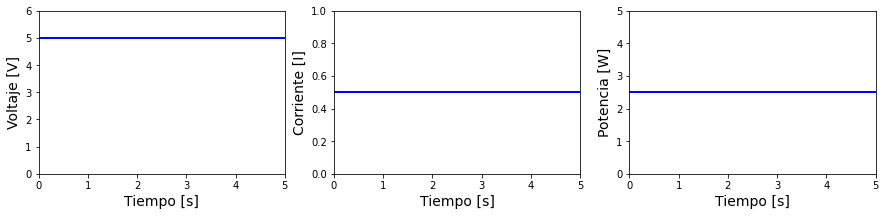

In [ ]:
#@title Gráficas señal DC
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,3,figsize=(15,3))
ax[0].plot([0, 5], [5, 5], 'b', lw=2)
ax[0].axis([0,5,0,6])
ax[0].set_xlabel('Tiempo [s]', fontsize=14)
ax[0].set_ylabel('Voltaje [V]', fontsize=14)

ax[1].plot([0, 5], [0.5, 0.5], 'b', lw=2)
ax[1].axis([0,5,0,1])
ax[1].set_xlabel('Tiempo [s]', fontsize=14)
ax[1].set_ylabel('Corriente [I]', fontsize=14)

ax[2].plot([0, 5], [2.5, 2.5], 'b', lw=2)
ax[2].axis([0,5,0,5])
ax[2].set_xlabel('Tiempo [s]', fontsize=14)
ax[2].set_ylabel('Potencia [W]', fontsize=14)

fig.show()

### 1.2. Corriente Alterna.

Asumamos una señal coseno (alterna en el tiempo entre valores positivos y negativos de voltaje y corriente) y un circuito puramente resistivo. Al ser un circuito resistivo, no hay desfase entre las señales de corriente y voltaje.

Por ejemplo, analicemos que ocurre al conectar una resistencia de $10 \Omega$ a un toma del sistema de distribución eléctrico.

La amplitud de la señal de voltaje es $169.7 V$ ($120 V_{RMS}$) y su frecuencia es $60 Hz$:

<br>
$$\large v(t) = 169.7 cos(2 \pi (60)) \, [V]$$
<br>

La corriente, empleando la Ley de Ohm:

$$\large i = \frac{v}{R} = \frac{169.7 cos(120 \pi)}{10} = 17 cos(120 \pi) \, [A]$$

### 1.3. Potencia instantánea.

La potencia instantánea $p(t)$ se calcula como:

$$\large p = i \cdot v$$

obteniendo:

$$\large p(t) = (169.7 cos(120 \pi))(17 cos(120 \pi)) \, [W]$$
<br>

$$\large p(t) = 2879.9 \, cos^2(120 \pi) \, [W]$$

### 1.4. Valor RMS.

Para señales AC es común calcular el valor RMS (Root Mean Square), que para una señal seno o coseno se calcula como:

$$\large V_{RMS} = \frac{V_0}{\sqrt{2}} \, [V] $$
<br>
$$\large I_{RMS} = \frac{I_0}{\sqrt{2}} \, [I] $$

donde $V_0$ es la amplitud de la señal de voltaje y $I_0$ es la amplitud de la señal de corriente.

### 1.5. Potencia promedio en el tiempo

La potencia promedio en el tiempo $P_{avg}$, se calcula como:

<br>
$$\large P{avg} = V_{RMS} \times I_{RMS} \, [W] $$

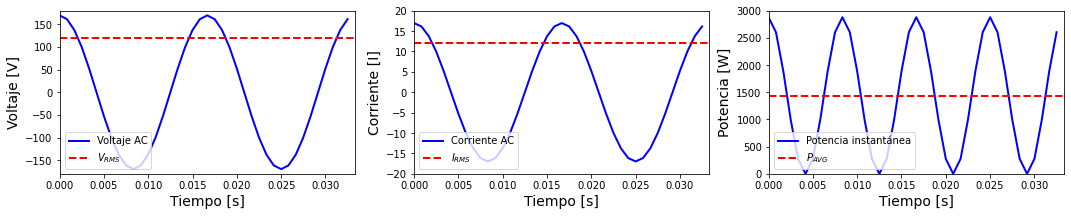

In [ ]:
#@title Señales AC
f=60
T=1/f
t = np.arange(0,2*T,T/20)

v = 169.7*np.cos(2*np.pi*f*t)
vrms = 169.7/np.sqrt(2)
i = v/10
irms = 169.7/np.sqrt(2)/10
p = v*i
Pavg = vrms*irms 

fig,ax = plt.subplots(1,3, figsize=(18,3))
ax[0].plot(t, v, 'b', lw=2, label='Voltaje AC')
ax[0].axis([0,2*T,-180,180])
ax[0].plot([0, 2*T], [vrms, vrms], 'r--', lw=2, label='$V_{RMS}$')
ax[0].legend(loc='lower left')
ax[0].set_xlabel('Tiempo [s]', fontsize=14)
ax[0].set_ylabel('Voltaje [V]', fontsize=14)
ax[1].plot(t, i, 'b', lw=2, label='Corriente AC')
ax[1].axis([0,2*T,-20,20])
ax[1].plot([0, 2*T], [irms, irms], 'r--', lw=2, label='$I_{RMS}$')
ax[1].legend(loc='lower left')
ax[1].set_xlabel('Tiempo [s]', fontsize=14)
ax[1].set_ylabel('Corriente [I]', fontsize=14)
ax[2].plot(t, p, 'b', lw=2, label='Potencia instantánea')
ax[2].axis([0,2*T, 0, 3000])
ax[2].plot([0, 2*T], [Pavg, Pavg], 'r--', lw=2, label='$P_{AVG}$')
ax[2].legend(loc='lower left')
ax[2].set_ylabel('Potencia [W]', fontsize=14)
ax[2].set_xlabel('Tiempo [s]', fontsize=14)

fig.show()

## 2.Ruido blanco Gausiano.

Se llama ruido blanco a una señal con densidad espectral de potencia casi plana. 

Se llama ruido Gausiano a una señal con distribución Gausiana.

Para una señal conformada por un conjunto de muestras, su valor RMS puede calcularse con su desviación estándar, que en **numpy** se calcula como:
> np.std()

El valor DC puede calcularse con su valor medio, que en **numpy** se calcula como:
> np.mean()

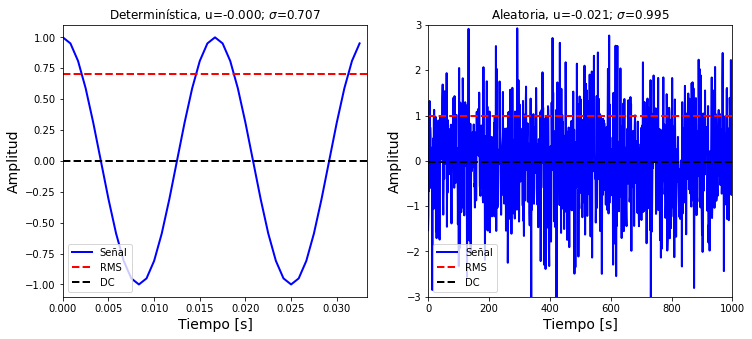

In [ ]:
#@title Señal determinística y aleatoria
f=60
T=1/f
t = np.arange(0,2*T,T/20)
Na = 1000

xd = np.cos(2*np.pi*f*t)
xa = np.random.normal(0, 1, Na)

xd_std = np.std(xd)
xd_u = np.mean(xd)
xa_std = np.std(xa)
xa_u = np.mean(xa)

fig,ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(t, xd, 'b', lw=2, label='Señal')
ax[0].axis([0,2*T,-1.1,1.1])
ax[0].plot([0, 2*T], [xd_std, xd_std], 'r--', lw=2, label='RMS')
ax[0].plot([0, 2*T], [xd_u, xd_u], 'k--', lw=2, label='DC')
ax[0].legend(loc='lower left')
ax[0].set_xlabel('Tiempo [s]', fontsize=14)
ax[0].set_ylabel('Amplitud', fontsize=14)
ax[0].set_title('Determinística, u={:.3f}; $\sigma$={:.3f}'.format(xd_u,xd_std))

ax[1].plot(np.arange(0,Na,1), xa,'b', lw=2, label='Señal')
ax[1].axis([0,Na,-3,3])
ax[1].plot([0, Na], [xa_std, xa_std], 'r--', lw=2, label='RMS')
ax[1].plot([0, Na], [xa_u, xa_u], 'k--', lw=2, label='DC')
ax[1].legend(loc='lower left')
ax[1].set_xlabel('Tiempo [s]', fontsize=14)
ax[1].set_ylabel('Amplitud', fontsize=14)
ax[1].set_title('Aleatoria, u={:.3f}; $\sigma$={:.3f}'.format(xa_u,xa_std))
fig.show()

## 3.Ruido térmico.

El valor RMS del voltaje generado por el ruido térmico se calcula como:

$$\large v_{RMS} = \sqrt{4kTRB}$$

donde:
- $k=1.38 \times 10^{-23} \, [J/K]$ es la constante de Boltzman.
- $T$ es la temperatura en grados Kelvin $[K]$.
- $R$ es la resistencia $[\Omega]$.
- $B$ es el ancho de banda sobre el que se mide el ruido $[Hz]$.
 
Una resistencia en cortocircuito, disipa una potencia de ruido térmico igual a: 

$$\large P = \frac{v_{RMS}^2}{R}$$

La máxima potencia de ruido que puede transmitirse (solo la mitad del voltaje) es:

$$\large P_n = kTB$$

## 4.Relación señal a ruido.

La relación señal a ruido (Signal to Noise Ratio, SNR) se calcula como:

$$\large SNR = \frac{Potencia\_señal}{Potencia\_ruido}$$

Es común que la potencia de ruido sea la potencia de ruido técmico que puede transferirse $P_n$.

## 5.Ejercicio interactivo.

Realizar empleando Python un panel (formulario) en el que el usuario pueda seleccionar:
- El ancho de banda de ruido (en MHz) entre 1 MHz y 1.000 MHz.
- El valor RMS de una señal coseno (en micro voltios) entre $1 \mu V$ y $10 \mu V$. La señal coseno de frecuencia $1 MHz$ a través de una resistencia de $1 \Omega$.

Debe generar dos gráficas con las siguientes características:
- La primera gráfica con la señal de voltaje de ruido térmico, indicando gráficamente su valor RMS.
- La segunda gráfica con la suma de la señal coseno y la señal de voltaje de ruido térmico. Deben presentarse 2 periodos de la señal coseno.

Fijar los rangos de los ejes.